In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
import mpl_toolkits
%matplotlib inline

In [47]:
df = pd.read_csv("./Documents/code/Ynov/ML/projet Fil Rouge/train.csv")

## Tete de fichier

In [48]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Describing the data frame

In [49]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


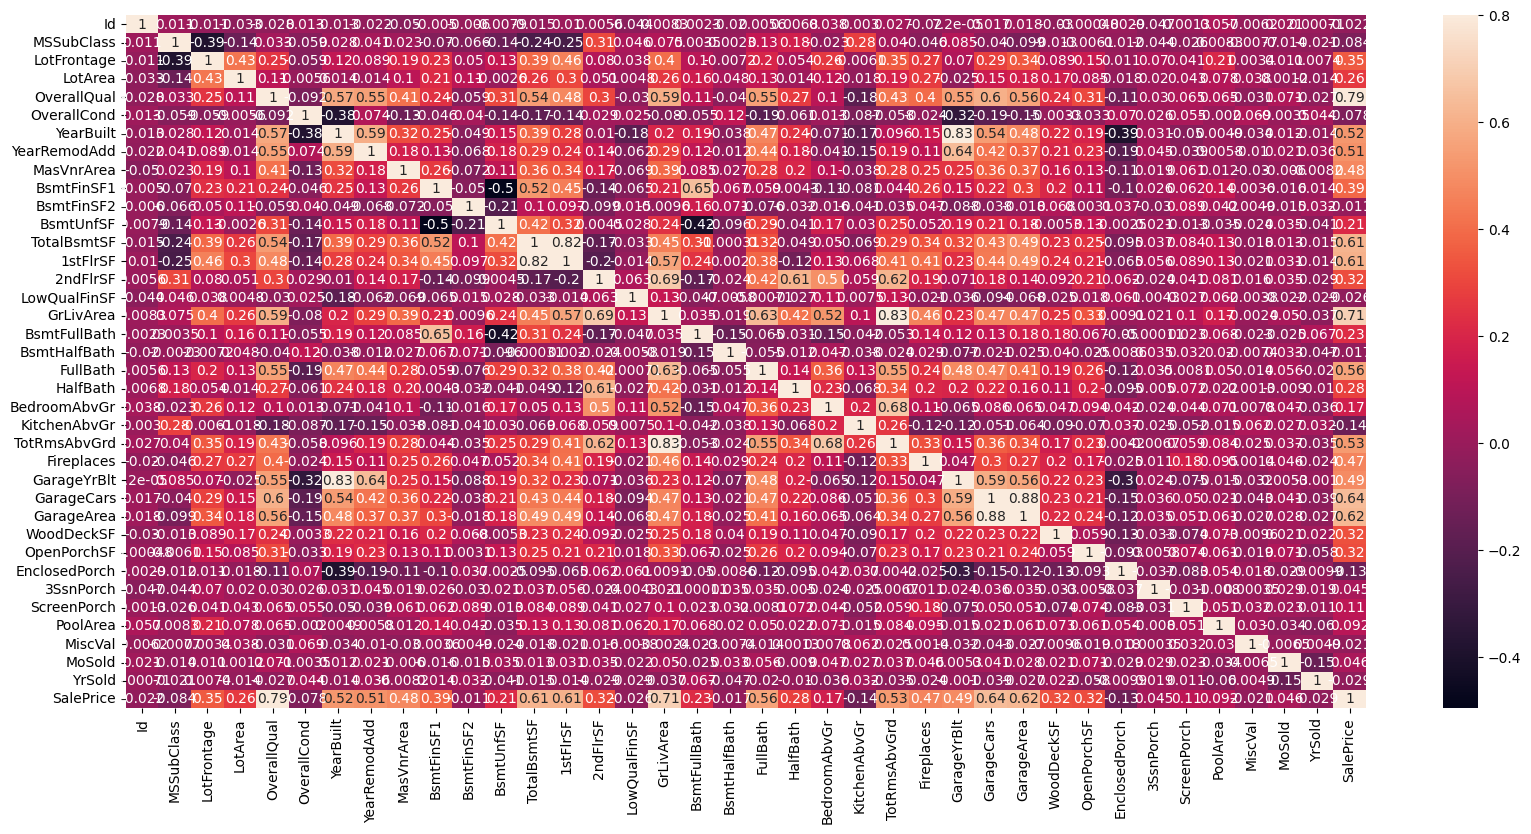

In [50]:
corrmat = df.corr()
f, ax = plot.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=.8, annot=True);

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

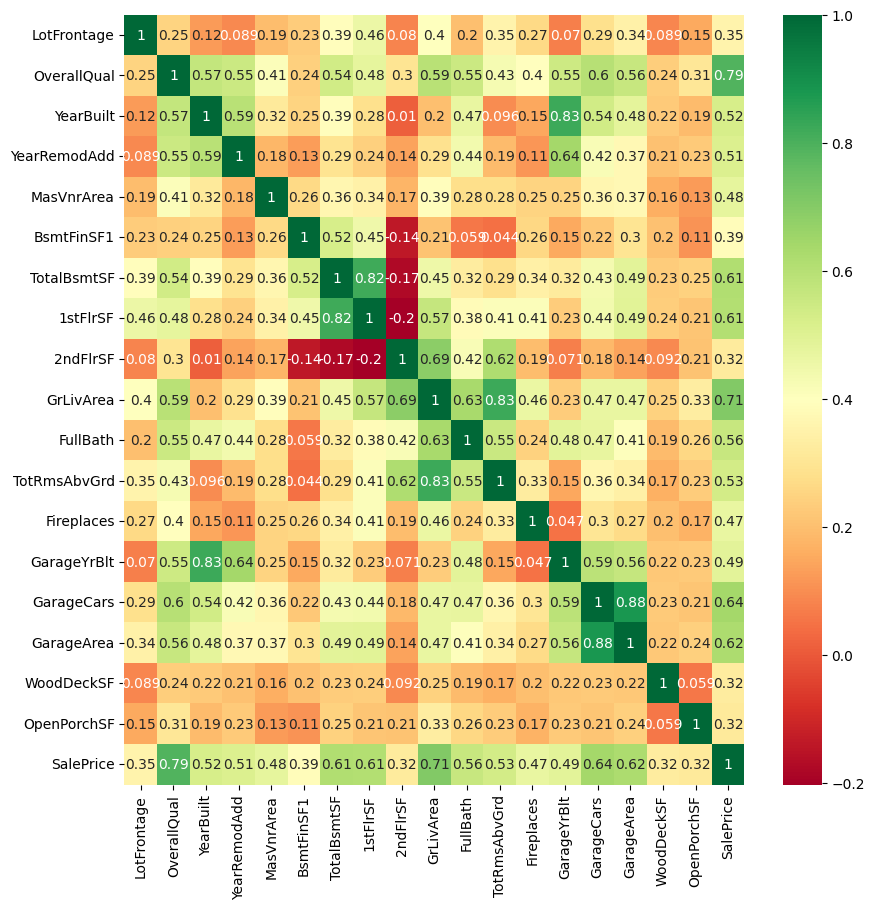

In [51]:
corrmat = df.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.30]
plot.figure(figsize=(10,10))
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
top_corr_features


So from this huge map, as we are only looking to see the corelations with the price of sales, we need to filter all metrics that are not relevants. So we will only keep those values :

## Scatter Overall Quality

Text(0.5, 1.0, 'Sales price vs Overall quality')

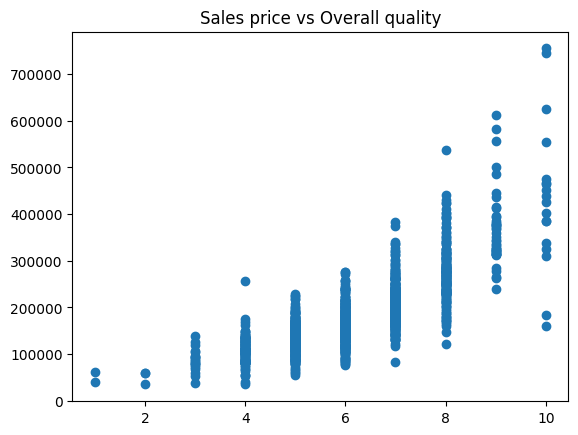

In [52]:
plot.scatter(df.OverallQual, df.SalePrice)
plot.title("Sales price vs Overall quality")

Certainement l'une des métrics les plus parlantes quant à sa relation avec le prix total du bien, qui est assez linéaire.

## Above ground living area (.71)

Text(0.5, 1.0, 'Sales price vs Above Ground Area')

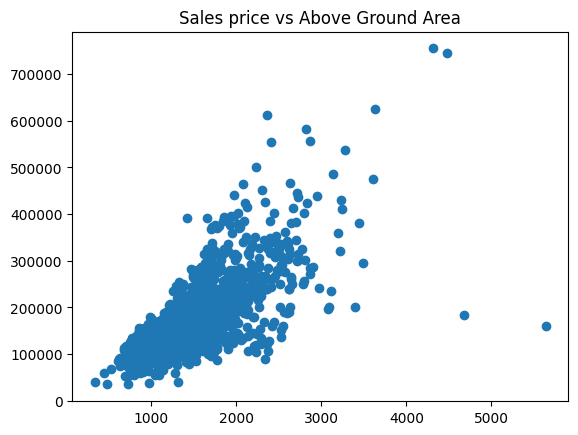

In [53]:
plot.scatter(df.GrLivArea, df.SalePrice)
plot.title("Sales price vs Above Ground Area")

Seconde métric qui est de loin la plus facile à remarquer, toute surface vivable se trouvant surélevé sera une caractéristique d'un prix élevé.

## Scatter location

In [54]:
df.Neighborhood.unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

Text(0.5, 1.0, 'Sales price vs Location')

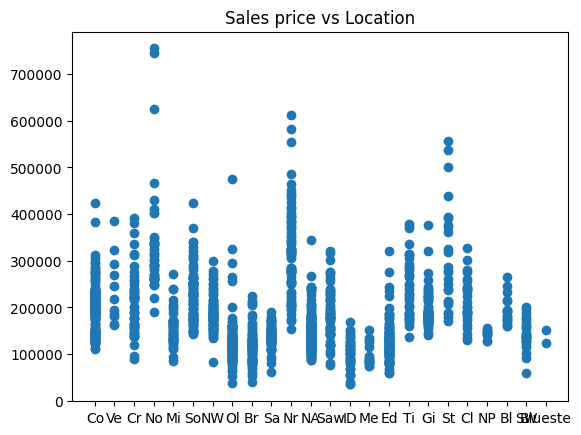

In [55]:
df = df.replace("CollgCr", "Co")
df = df.replace("Veenker", "Ve")
df = df.replace("Crawfor", "Cr")
df = df.replace("NoRidge", "No")
df = df.replace("Mitchel", "Mi")
df = df.replace("Somerst", "So")
df = df.replace("NWAmes", "NW")
df = df.replace("OldTown", "Ol")
df = df.replace("BrkSide", "Br")
df = df.replace("Sawyer", "Sa")
df = df.replace("NridgHt", "Nr")
df = df.replace("NAmes", "NA")
df = df.replace("SawyerW", "Saw")
df = df.replace("IDOTRR", "ID")
df = df.replace("MeadowV", "Me")
df = df.replace("Edwards", "Ed")
df = df.replace("Timber", "Ti")
df = df.replace("Gilbert", "Gi")
df = df.replace("StoneBr", "St")
df = df.replace("ClearCr", "Cl")
df = df.replace("NPkVill", "NP")
df = df.replace("Blmngtn", "Bl")
df = df.replace("BrDale", "Br")
df = df.replace("SWISU", "SW")
plot.scatter(df.Neighborhood, df.SalePrice)
plot.title("Sales price vs Location")


Ici nous pouvons clairement constater des villes avec un prix par bien beaucoup plus élevé. Cette statistique se révellera très utile en pour savoir d'avance si un bien à prix élevé va pouvoir se vendre dans une localisation précise.

## Garage (.62 & .64)

Text(0.5, 1.0, 'Sales price vs Garage Area (.62)')

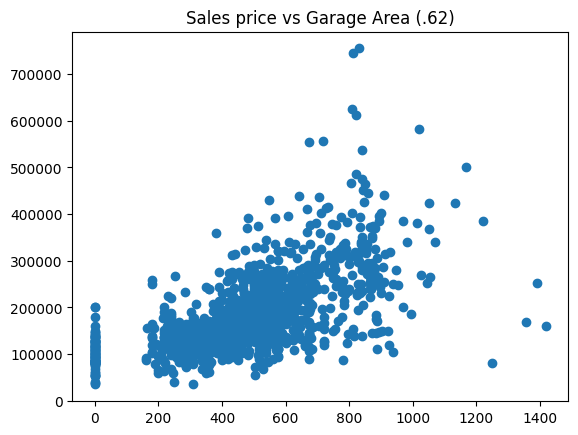

In [56]:
plot.scatter(df.GarageArea, df.SalePrice)
plot.title("Sales price vs Garage Area (.62)")

Text(0.5, 1.0, 'Sales price vs Garage Capability (.64)')

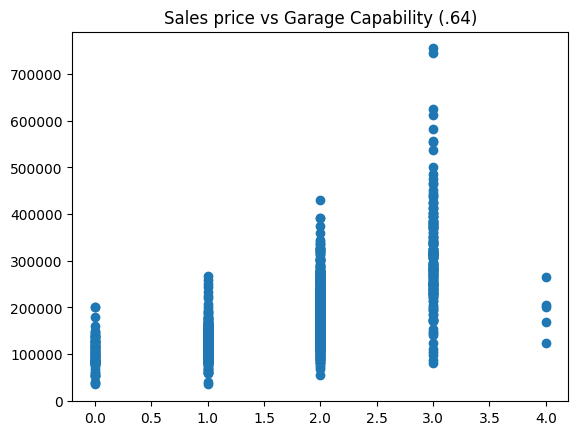

In [57]:
plot.scatter(df.GarageCars, df.SalePrice)
plot.title("Sales price vs Garage Capability (.64)")

On peut donc remarquer que le garage est plutot linéaire dans sa relation avec le prix du bien total, un garage pouvant contenir plus de voitures et aillant une plus grande surface donnera un bien plus cher.

## Fireplaces (.47)

Text(0.5, 1.0, 'Sales price vs Fireplaces number (.47)')

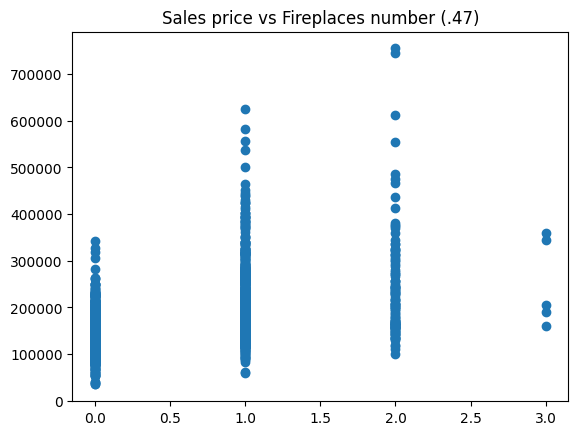

In [58]:
plot.scatter(df.Fireplaces, df.SalePrice)
plot.title("Sales price vs Fireplaces number (.47)")

Statistique assez étonnante car elle ne révèle pas une grande proximité avec le prix mais un bien aillant une cheminé pourra directement se placer dans la catégorie tarifaire suppérieure. On peut par aillent voir qu'une maison avec plus d'une cheminé ne fait aucune différence, a quelques exceptions prés.

## Basement Aera

Text(0.5, 1.0, 'Sales price vs Basement Aera (.61)')

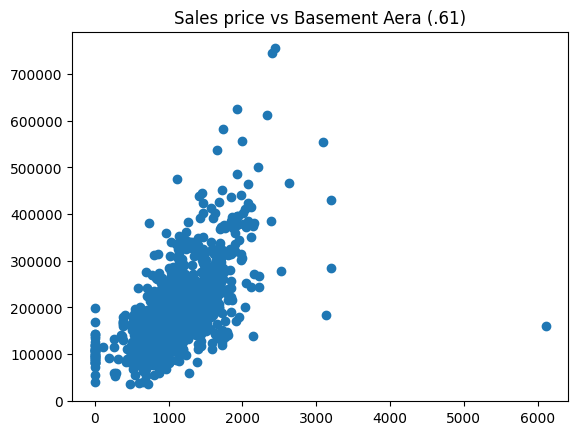

In [59]:
plot.scatter(df.TotalBsmtSF, df.SalePrice)
plot.title("Sales price vs Basement Aera (.61)")

All living aera totally below ground level is a bonus on the price too ! And it's quite fast.

## First Floor Aera

Text(0.5, 1.0, 'Sales price vs First Floor Aera (.61)')

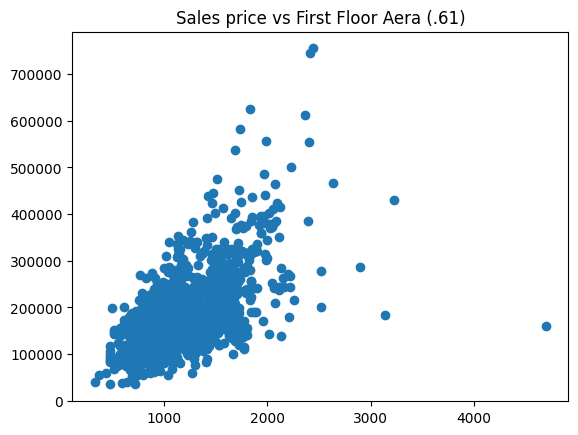

In [60]:
plot.scatter(df["1stFlrSF"], df.SalePrice)
plot.title("Sales price vs First Floor Aera (.61)")

Satistique assez drole, mais très parlante aussi : la surface vivable du première étage est un bonus assez gros sur le prix, mais toute surface en plus sur le 2nd étage est très loin d'etre aussi important.

In [61]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [62]:
(missing_data[missing_data['Total'] >= 1]).index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageYrBlt', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual',
       'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1',
       'MasVnrArea', 'MasVnrType', 'Electrical'],
      dtype='object')

In [63]:
df = df.drop((missing_data[missing_data['Total'] > 1]).index,1)
df = df.drop(df.loc[df['Electrical'].isnull()].index)
df.isnull().sum().max()

C:\Users\SMsho\AppData\Local\Temp\ipykernel_5148\2518235326.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop((missing_data[missing_data['Total'] > 1]).index,1)


0

## Training

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
trained = LinearRegression()
labels = df["SalePrice"]
train1 = df.drop(df.columns.difference(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']), axis=1)

x_train, x_test , y_train , y_test = train_test_split(train1, labels, test_size=0.10, random_state=2)
trained.fit(x_train, y_train)
trained.score(x_test, y_test)

0.8405425221032695

## Gradiant boosting regression

In [66]:
from sklearn.ensemble import GradientBoostingRegressor
est = GradientBoostingRegressor(n_estimators=2000, learning_rate=0.1, max_depth=1, random_state=0).fit(x_train, y_train)
est.score(x_test, y_test)

0.883604625349237

## Testing on local test file